In [1]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade numba

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install matplotlib arch pandas pandas_ta numpy


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [28]:
import matplotlib.pyplot as plt
from arch import arch_model
import pandas_ta
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns

In [7]:
# Load Simulated Daily and Simulated 5-minute data.
daily_df = pd.read_csv('simulated_daily_data.csv')

daily_df = daily_df.drop('Unnamed: 7', axis=1)

daily_df['Date'] = pd.to_datetime(daily_df['Date'])

daily_df = daily_df.set_index('Date')

In [8]:
# Define function to fit GARCH model and predict 1-day ahead volatility in a rolling window.
intraday_5min_df = pd.read_csv(os.path.join('simulated_5min_data.csv'))

intraday_5min_df = intraday_5min_df.drop('Unnamed: 6', axis=1)

intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])

intraday_5min_df = intraday_5min_df.set_index('datetime')

intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df.index.date)

intraday_5min_df    

,open,low,high,close,volume,date
datetime,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,2021-09-29
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,2021-09-29
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,2021-09-29
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,2021-09-29
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,2021-09-29
...,...,...,...,...,...,...
2023-09-20 10:40:00,6792.1025,6783.6000,6796.2500,6790.1375,41,2023-09-20
2023-09-20 10:45:00,6790.5575,6779.1000,6795.7500,6781.9175,42,2023-09-20
2023-09-20 10:50:00,6781.5475,6779.3750,6790.2500,6783.9050,44,2023-09-20


In [16]:
warnings.filterwarnings('ignore')
daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

daily_df['variance'] = daily_df['log_ret'].rolling(180).var()

daily_df = daily_df['2020':]

def predict_volatility(x):
    
    best_model = arch_model(y=x,
                            p=1,
                            q=3).fit(update_freq=5,
                                     disp='off')
    
    variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1,0]

    print(x.index[-1])
    
    return variance_forecast

daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x: predict_volatility(x))

daily_df = daily_df.dropna()

daily_df

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warning

2020-12-25 00:00:00
2020-12-26 00:00:00
2020-12-27 00:00:00
2020-12-28 00:00:00
2020-12-29 00:00:00
2020-12-30 00:00:00
2020-12-31 00:00:00
2021-01-01 00:00:00
2021-01-02 00:00:00
2021-01-03 00:00:00


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-01-04 00:00:00
2021-01-05 00:00:00
2021-01-06 00:00:00
2021-01-07 00:00:00
2021-01-08 00:00:00
2021-01-09 00:00:00
2021-01-10 00:00:00
2021-01-11 00:00:00
2021-01-12 00:00:00


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-01-13 00:00:00
2021-01-14 00:00:00
2021-01-15 00:00:00
2021-01-16 00:00:00
2021-01-17 00:00:00
2021-01-18 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-23 00:00:00
2021-01-24 00:00:00
2021-01-25 00:00:00
2021-01-26 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-01-30 00:00:00
2021-01-31 00:00:00
2021-02-01 00:00:00
2021-02-02 00:00:00
2021-02-03 00:00:00
2021-02-04 00:00:00
2021-02-05 00:00:00
2021-02-06 00:00:00
2021-02-07 00:00:00
2021-02-08 00:00:00
2021-02-09 00:00:00
2021-02-10 00:00:00
2021-02-11 00:00:00
2021-02-12 00:00:00
2021-02-13 00:00:00
2021-02-14 00:00:00
2021-02-15 00:00:00
2021-02-16 00:00:00
2021-02-17 00:00:00
2021-02-18 00:00:00
2021-02-19 00:00:00
2021-02-20 00:00:00
2021-02-21 00:00:00
2021-02-22 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-02-27 00:00:00
2021-02-28 00:00:00
2021-03-01 00:00:00
2021-03-02 00:00:00
2021-03-03 00:00:00


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-03-10 00:00:00
2021-03-11 00:00:00
2021-03-12 00:00:00
2021-03-13 00:00:00
2021-03-14 00:00:00
2021-03-15 00:00:00
2021-03-16 00:00:00


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-03-17 00:00:00
2021-03-18 00:00:00
2021-03-19 00:00:00
2021-03-20 00:00:00
2021-03-21 00:00:00
2021-03-22 00:00:00
2021-03-23 00:00:00
2021-03-24 00:00:00
2021-03-25 00:00:00
2021-03-26 00:00:00
2021-03-27 00:00:00
2021-03-28 00:00:00
2021-03-29 00:00:00
2021-03-30 00:00:00
2021-03-31 00:00:00
2021-04-01 00:00:00
2021-04-02 00:00:00
2021-04-03 00:00:00
2021-04-04 00:00:00
2021-04-05 00:00:00
2021-04-06 00:00:00
2021-04-07 00:00:00
2021-04-08 00:00:00
2021-04-09 00:00:00
2021-04-10 00:00:00
2021-04-11 00:00:00
2021-04-12 00:00:00
2021-04-13 00:00:00
2021-04-14 00:00:00
2021-04-15 00:00:00
2021-04-16 00:00:00
2021-04-17 00:00:00
2021-04-18 00:00:00
2021-04-19 00:00:00
2021-04-20 00:00:00
2021-04-21 00:00:00
2021-04-22 00:00:00
2021-04-23 00:00:00
2021-04-24 00:00:00
2021-04-25 00:00:00
2021-04-26 00:00:00
2021-04-27 00:00:00
2021-04-28 00:00:00
2021-04-29 00:00:00
2021-04-30 00:00:00
2021-05-01 00:00:00
2021-05-02 00:00:00
2021-05-03 00:00:00
2021-05-04 00:00:00
2021-05-05 00:00:00


2022-05-09 00:00:00
2022-05-10 00:00:00
2022-05-11 00:00:00
2022-05-12 00:00:00
2022-05-13 00:00:00
2022-05-14 00:00:00
2022-05-15 00:00:00
2022-05-16 00:00:00
2022-05-17 00:00:00
2022-05-18 00:00:00
2022-05-19 00:00:00
2022-05-20 00:00:00
2022-05-21 00:00:00
2022-05-22 00:00:00
2022-05-23 00:00:00
2022-05-24 00:00:00
2022-05-25 00:00:00
2022-05-26 00:00:00
2022-05-27 00:00:00
2022-05-28 00:00:00
2022-05-29 00:00:00
2022-05-30 00:00:00
2022-05-31 00:00:00
2022-06-01 00:00:00
2022-06-02 00:00:00
2022-06-03 00:00:00
2022-06-04 00:00:00
2022-06-05 00:00:00
2022-06-06 00:00:00
2022-06-07 00:00:00
2022-06-08 00:00:00
2022-06-09 00:00:00
2022-06-10 00:00:00
2022-06-11 00:00:00
2022-06-12 00:00:00
2022-06-13 00:00:00
2022-06-14 00:00:00
2022-06-15 00:00:00
2022-06-16 00:00:00
2022-06-17 00:00:00
2022-06-18 00:00:00
2022-06-19 00:00:00
2022-06-20 00:00:00


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warning

2022-06-21 00:00:00
2022-06-22 00:00:00
2022-06-23 00:00:00
2022-06-24 00:00:00
2022-06-25 00:00:00
2022-06-26 00:00:00
2022-06-27 00:00:00
2022-06-28 00:00:00
2022-06-29 00:00:00
2022-06-30 00:00:00
2022-07-01 00:00:00
2022-07-02 00:00:00
2022-07-03 00:00:00
2022-07-04 00:00:00
2022-07-05 00:00:00
2022-07-06 00:00:00
2022-07-07 00:00:00
2022-07-08 00:00:00
2022-07-09 00:00:00
2022-07-10 00:00:00
2022-07-11 00:00:00
2022-07-12 00:00:00
2022-07-13 00:00:00
2022-07-14 00:00:00
2022-07-15 00:00:00
2022-07-16 00:00:00
2022-07-17 00:00:00
2022-07-18 00:00:00
2022-07-19 00:00:00
2022-07-20 00:00:00
2022-07-21 00:00:00
2022-07-22 00:00:00
2022-07-23 00:00:00
2022-07-24 00:00:00
2022-07-25 00:00:00
2022-07-26 00:00:00
2022-07-27 00:00:00
2022-07-28 00:00:00
2022-07-29 00:00:00
2022-07-30 00:00:00
2022-07-31 00:00:00
2022-08-01 00:00:00
2022-08-02 00:00:00
2022-08-03 00:00:00
2022-08-04 00:00:00
2022-08-05 00:00:00
2022-08-06 00:00:00
2022-08-07 00:00:00
2022-08-08 00:00:00
2022-08-09 00:00:00


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2023-04-27 00:00:00
2023-04-28 00:00:00
2023-04-29 00:00:00
2023-04-30 00:00:00
2023-05-01 00:00:00
2023-05-02 00:00:00
2023-05-03 00:00:00
2023-05-04 00:00:00
2023-05-05 00:00:00
2023-05-06 00:00:00
2023-05-07 00:00:00
2023-05-08 00:00:00
2023-05-09 00:00:00
2023-05-10 00:00:00
2023-05-11 00:00:00
2023-05-12 00:00:00
2023-05-13 00:00:00
2023-05-14 00:00:00
2023-05-15 00:00:00
2023-05-16 00:00:00
2023-05-17 00:00:00
2023-05-18 00:00:00
2023-05-19 00:00:00
2023-05-20 00:00:00
2023-05-21 00:00:00
2023-05-22 00:00:00
2023-05-23 00:00:00
2023-05-24 00:00:00
2023-05-25 00:00:00
2023-05-26 00:00:00
2023-05-27 00:00:00
2023-05-28 00:00:00
2023-05-29 00:00:00
2023-05-30 00:00:00
2023-05-31 00:00:00
2023-06-01 00:00:00
2023-06-02 00:00:00
2023-06-03 00:00:00
2023-06-04 00:00:00
2023-06-05 00:00:00
2023-06-06 00:00:00
2023-06-07 00:00:00
2023-06-08 00:00:00
2023-06-09 00:00:00
2023-06-10 00:00:00
2023-06-11 00:00:00
2023-06-12 00:00:00
2023-06-13 00:00:00
2023-06-14 00:00:00
2023-06-15 00:00:00


,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2021-01-14,9331.277344,9991.601563,9217.140625,9796.832031,9796.832031,6.361599e+10,0.048922,0.001013,0.001608,0.586445,1.095007,1.0
2021-01-16,9205.412109,9466.091797,8908.388672,9044.535156,9044.535156,5.770619e+10,-0.017732,0.001044,0.002001,0.917634,1.095539,1.0
2021-01-22,7704.406250,8452.962891,7238.343262,8251.440430,8251.440430,7.720727e+10,0.068333,0.001194,0.002611,1.186366,1.100775,1.0
2021-01-23,8246.439453,8340.244141,7873.290039,8016.910645,8016.910645,4.835474e+10,-0.028835,0.001148,0.002328,1.028038,1.098956,1.0
2021-01-25,8071.449707,8700.685547,8021.946777,8091.598145,8091.598145,5.989705e+10,0.002382,0.001146,0.002036,0.776391,1.101212,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,6808.912598,6833.045410,6536.747070,6586.499512,6586.499512,1.953005e+10,-0.033325,0.000614,0.000908,0.479725,0.956932,1.0
2023-06-21,7077.827637,7684.332520,7070.852539,7506.824219,7506.824219,3.334676e+10,0.058274,0.000635,0.001709,1.691655,0.971014,1.0
2023-06-22,7498.983887,7623.999512,7419.789551,7478.070313,7478.070313,2.065316e+10,-0.003838,0.000635,0.000512,-0.194219,0.970861,1.0


In [36]:
# Calculate prediction premium and form a daily signal from it.
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()

daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])
                                         else (-1 if (x['prediction_premium']<x['premium_std']*-1) else np.nan),
                                         axis=1)

daily_df['signal_daily'] = daily_df['signal_daily'].shift()

daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2021-01-14,9331.277344,9991.601563,9217.140625,9796.832031,9796.832031,6.361599e+10,0.048922,0.001013,0.001608,0.586445,NaN,NaN
2021-01-16,9205.412109,9466.091797,8908.388672,9044.535156,9044.535156,5.770619e+10,-0.017732,0.001044,0.002001,0.917634,NaN,NaN
2021-01-22,7704.406250,8452.962891,7238.343262,8251.440430,8251.440430,7.720727e+10,0.068333,0.001194,0.002611,1.186366,NaN,NaN
2021-01-23,8246.439453,8340.244141,7873.290039,8016.910645,8016.910645,4.835474e+10,-0.028835,0.001148,0.002328,1.028038,NaN,NaN
2021-01-25,8071.449707,8700.685547,8021.946777,8091.598145,8091.598145,5.989705e+10,0.002382,0.001146,0.002036,0.776391,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,6808.912598,6833.045410,6536.747070,6586.499512,6586.499512,1.953005e+10,-0.033325,0.000614,0.000908,0.479725,0.871245,1.0
2023-06-21,7077.827637,7684.332520,7070.852539,7506.824219,7506.824219,3.334676e+10,0.058274,0.000635,0.001709,1.691655,0.878886,NaN
2023-06-22,7498.983887,7623.999512,7419.789551,7478.070313,7478.070313,2.065316e+10,-0.003838,0.000635,0.000512,-0.194219,0.878209,1.0


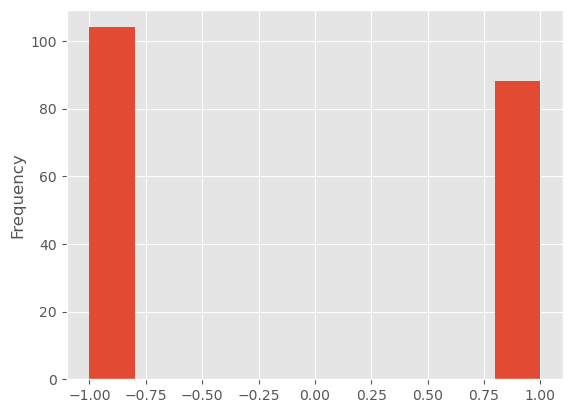

In [11]:
plt.style.use('ggplot')

daily_df['signal_daily'].plot(kind='hist')

plt.show()

In [35]:
# Merge with intraday data and calculate intraday indicators to form the intraday signal.
final_df = intraday_5min_df.reset_index()\
                            .merge(daily_df[['signal_daily']].reset_index(),
                                   left_on='date',
                                   right_on='Date')\
                            .drop(['date','Date'], axis=1)\
                            .set_index('datetime')

final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
                                length=20)

final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,0]

final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,2]

final_df['signal_intraday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)&
                                                            (x['close']>x['uband'])
                                             else (-1 if (x['rsi']<30)&
                                                         (x['close']<x['lband']) else np.nan),
                                             axis=1)

final_df['return'] = np.log(final_df['close']).diff()

final_df

,open,low,high,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return
datetime,,,,,,,,,,,
2021-10-02 00:00:00,11887.2500,11875.000,11899.3875,11892.9850,24,1.0,NaN,NaN,NaN,NaN,NaN
2021-10-02 00:05:00,11893.2275,11883.325,11930.5000,11922.4000,42,1.0,NaN,NaN,NaN,NaN,0.002470
2021-10-02 00:10:00,11922.2975,11901.485,11928.2500,11916.9700,38,1.0,NaN,NaN,NaN,NaN,-0.000456
2021-10-02 00:15:00,11916.5000,11900.680,11930.2500,11928.3200,49,1.0,NaN,NaN,NaN,NaN,0.000952
2021-10-02 00:20:00,11928.5325,11901.220,11929.6250,11903.5325,19,1.0,NaN,NaN,NaN,NaN,-0.002080
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 23:35:00,6796.8375,6794.435,6806.2500,6799.2450,7,1.0,45.274626,6794.822890,6804.745860,NaN,0.000354
2023-08-30 23:40:00,6799.2450,6795.675,6806.2500,6796.5450,8,1.0,42.403601,6794.445345,6804.741155,NaN,-0.000397
2023-08-30 23:45:00,6796.5450,6795.700,6806.2500,6798.7300,10,1.0,45.355443,6794.374831,6804.692669,NaN,0.000321


In [34]:
# Generate the position entry and hold until the end of the day.
final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==1)&(x['signal_intraday']==1)
                                        else (1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1) else np.nan),
                                        axis=1)

final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign']\
                                  .transform(lambda x: x.ffill())

final_df['forward_return'] = final_df['return'].shift(-1)

final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']

daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()

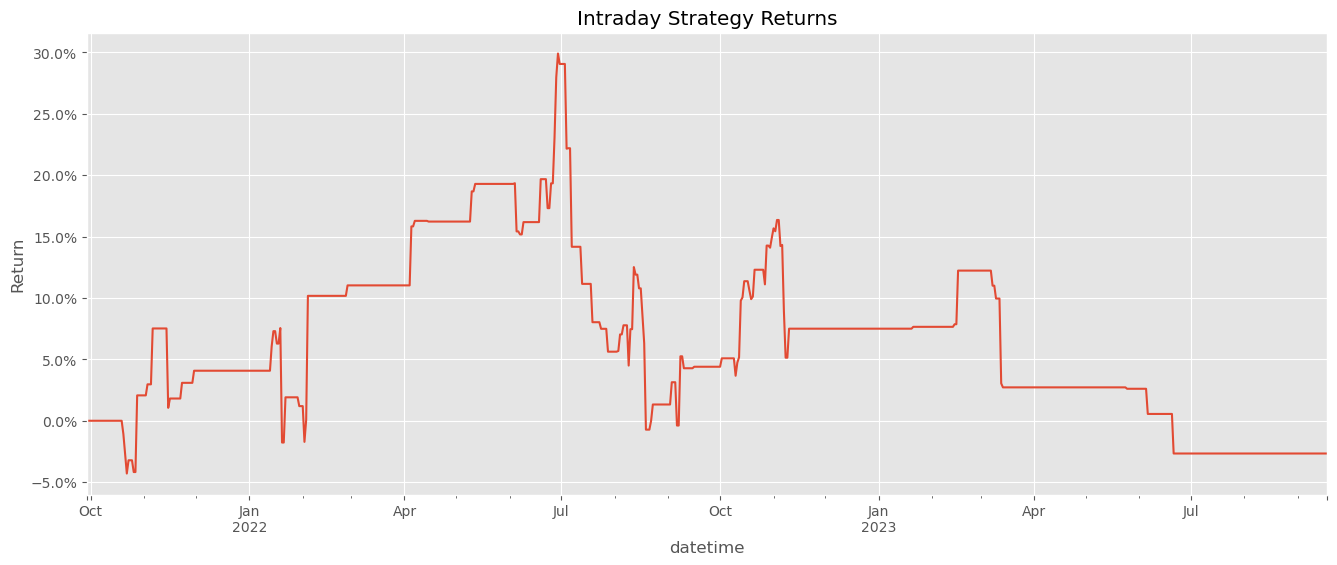

In [33]:
# Calculate Final Streategy Returns
import matplotlib.ticker as mtick

strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(16,6))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()

In [20]:
#Monte Carlo Simulation Functions
def monte_carlo_sims(log_returns, num_sims, num_days):
    simulations = np.zeros((num_sims, num_days))
    for i in range(num_sims):
        simulated_path = np.random.choice(log_returns, size=num_days, replace=True)
        simulations[i] = np.cumsum(simulated_path)
    return simulations

In [23]:
# Parameters for Monte Carlo simulations
num_simulations = 1000
num_days = 252  # 1 trading year in the US markets

In [22]:
# Run Monte Carlo simulations
log_returns = final_df['return'].dropna().values
simulations = monte_carlo_simulations(log_returns, num_simulations, num_days)

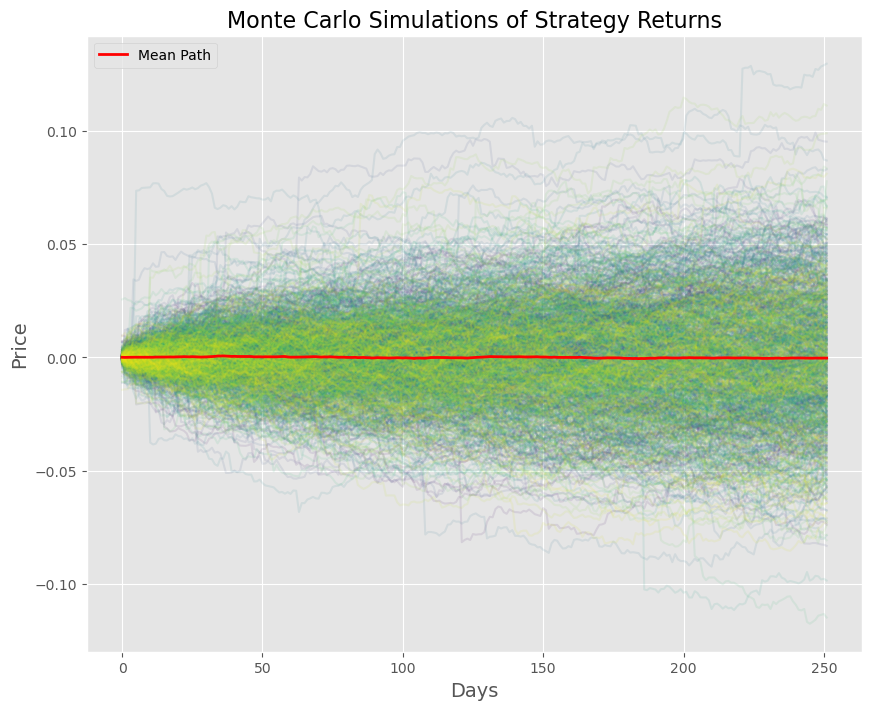

In [30]:
# Plot the simulation results with a colormap
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("viridis", as_cmap=True)
for i in range(num_simulations):
    plt.plot(simulations[i], color=cmap(i / num_simulations), alpha=0.1)

# Plot the mean path
mean_path = np.mean(simulations, axis=0)
plt.plot(mean_path, color='red', linewidth=2, label='Mean Path')

# Add labels and title
plt.title('Monte Carlo Simulations of Strategy Returns', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Calculate risk metrics from simulations (e.g., VaR, CVaR)
simulation_end_values = simulations[:, -1]
VaR_95 = np.percentile(simulation_end_values, 5)
CVaR_95 = simulation_end_values[simulation_end_values <= VaR_95].mean()

In [26]:
print(f"Value at Risk (95%): {VaR_95:.2%}")
print(f"Conditional Value at Risk (95%): {CVaR_95:.2%}")

Value at Risk (95%): -5.20%
Conditional Value at Risk (95%): -6.44%


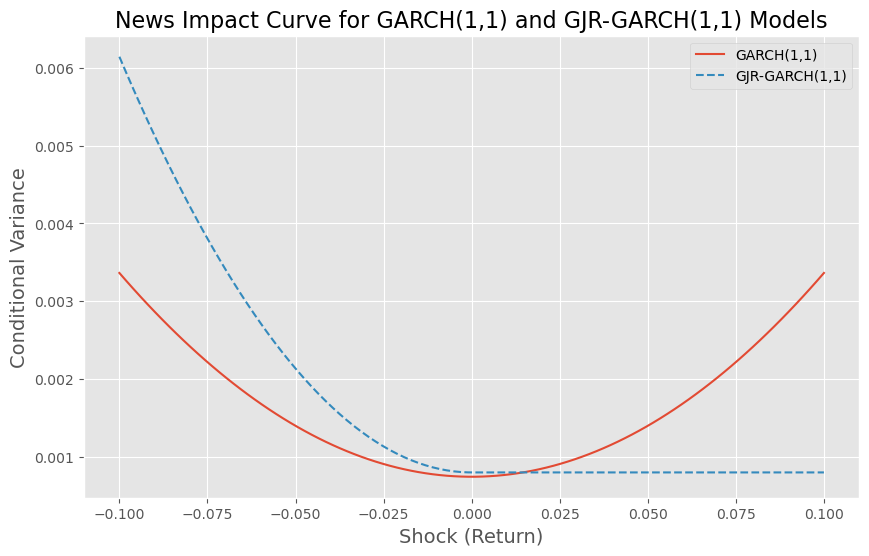

In [32]:
# Fit GARCH(1,1) model to the historical returns
garch_model = arch_model(daily_df['log_ret'].dropna(), vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Fit GJR-GARCH(1,1) model to the historical returns
gjr_garch_model = arch_model(daily_df['log_ret'].dropna(), vol='Garch', p=1, q=1, o=1)
gjr_garch_fit = gjr_garch_model.fit(disp='off')

# Extract GARCH model parameters
omega_garch = garch_fit.params['omega']
alpha_garch = garch_fit.params['alpha[1]']
beta_garch = garch_fit.params['beta[1]']

# Extract GJR-GARCH model parameters
omega_gjr = gjr_garch_fit.params['omega']
alpha_gjr = gjr_garch_fit.params['alpha[1]']
gamma_gjr = gjr_garch_fit.params['gamma[1]']
beta_gjr = gjr_garch_fit.params['beta[1]']

# Define function to compute conditional variance for GARCH given a shock
def news_impact_curve_garch(returns, omega, alpha, beta):
    return omega + alpha * returns**2 + beta * omega

# Define function to compute conditional variance for GJR-GARCH given a shock
def news_impact_curve_gjr_garch(returns, omega, alpha, gamma, beta):
    return omega + (alpha + gamma * (returns < 0)) * returns**2 + beta * omega

# Generate a range of returns (shocks)
shock_values = np.linspace(-0.10, 0.10, 100)  # Adjust the range if necessary

# Compute the impact of these shocks on volatility for both models
impact_values_garch = news_impact_curve_garch(shock_values, omega_garch, alpha_garch, beta_garch)
impact_values_gjr_garch = news_impact_curve_gjr_garch(shock_values, omega_gjr, alpha_gjr, gamma_gjr, beta_gjr)

# Plot the news impact curves
plt.figure(figsize=(10, 6))
plt.plot(shock_values, impact_values_garch, label='GARCH(1,1)')
plt.plot(shock_values, impact_values_gjr_garch, label='GJR-GARCH(1,1)', linestyle='--')
plt.title('News Impact Curve for GARCH(1,1) and GJR-GARCH(1,1) Models', fontsize=16)
plt.xlabel('Shock (Return)', fontsize=14)
plt.ylabel('Conditional Variance', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()